# FCN: Fully Convolutional Network

In [ ]:
from torchvision import models

#convolutional network como background "resnet"
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()
fcn = fcn.to('cuda')

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


2020-11-08 17:08:31 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.png" [1]


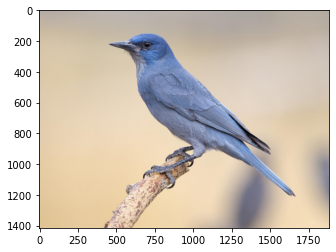

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('bird.png')
plt.imshow(img); plt.show()

In [ ]:
import torchvision.transforms as T

#transformacion de la imagen
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [ ]:
out = fcn(inp.to('cuda'))['out']
print (out.shape)

torch.Size([1, 21, 224, 224])


In [ ]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))
#[0 representa fondo y 3 indice del objeto segmentado]

(224, 224)
[0 3]


In [ ]:
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),       # 0=fondo
                           (128, 0, 0),     # 1=avion
                           (0, 128, 0),     # 2=bicicleta
                           (128, 128, 0),   # 3 = pajaro
                           (0, 0, 128),     # 4 = bote
                           (128, 0, 128),   # 5 = botella
                           (0, 128, 128),   # 6 = bus
                           (128, 164, 231), # 7 = carro 
                           (64, 0, 0),      # 8 = gato
                           (192, 0, 0),     # 9 = silla
                           (64, 128, 0),    # 10 = vaca
                           (192, 128, 0),   # 11 = mesa
                           (64, 0, 128),    # 12 = perro
                           (192, 0, 128),   # 13 = caballo
                           (64, 128, 128),  # 14 = moto
                           (192, 128, 128), # 15 = persona
                           (0, 64, 0),      # 16 = macetero
                           (128, 64, 0),    # 17 = oveja
                           (0, 192, 0),     # 18 = sofa
                           (128, 192, 0),   # 19 = tren
                           (0, 64, 128)])  # 20 = tv/monitor
               
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

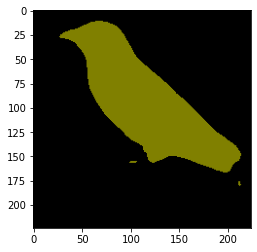

In [ ]:
#mostramos segmentacion obtenida por el modelo
rgb = decode_segmap(om)
plt.imshow(rgb)
plt.show()

In [ ]:
def segment(net, path, show_orig=True, dev='cuda'):
  img = Image.open(path)
  if show_orig: plt.imshow(img); plt.axis('off'); plt.show()
  trf = T.Compose([T.Resize(640), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0).to(dev)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()
  return rgb

In [ ]:
!wget dealain.com/descargas/segmentacion_files.zip
!unzip segmentacion_files.zip

--2020-11-08 17:11:09--  http://dealain.com/descargas/segmentacion_files.zip
Resolving dealain.com (dealain.com)... 192.185.91.239
Connecting to dealain.com (dealain.com)|192.185.91.239|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33510031 (32M) [application/zip]
Saving to: ‘segmentacion_files.zip’

segmentacion_files. 100%[===================>]  31.96M  41.7MB/s    in 0.8s    

2020-11-08 17:11:10 (41.7 MB/s) - ‘segmentacion_files.zip’ saved [33510031/33510031]

Archive:  segmentacion_files.zip
  inflating: caballo.jpeg            
   creating: __MACOSX/
  inflating: __MACOSX/._caballo.jpeg  
  inflating: pareja.jpeg             
  inflating: __MACOSX/._pareja.jpeg  
  inflating: parking.png             
  inflating: __MACOSX/._parking.png  


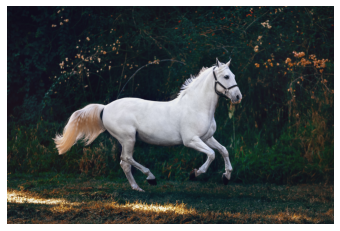

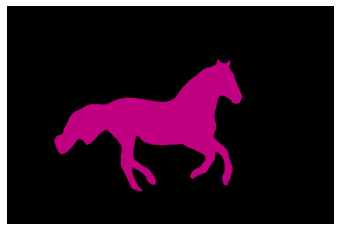

In [ ]:
output = segment(fcn, 'caballo.jpeg')

# DeepLab: equivalente a FCN 

In [ ]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()
dlab = dlab.to('cuda')

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


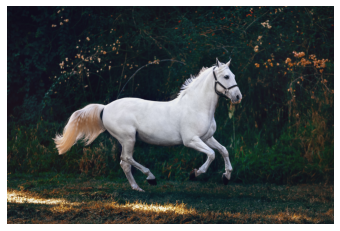

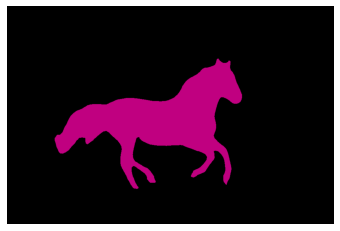

In [ ]:
output = segment(dlab, 'caballo.jpeg')

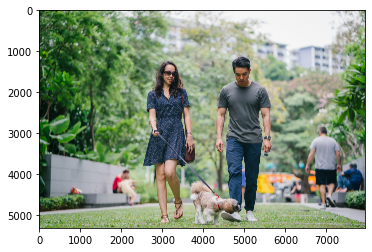

Segmentation Image on FCN


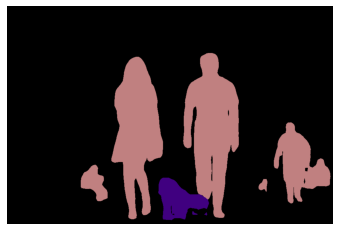

Segmentation Image on DeepLabv3


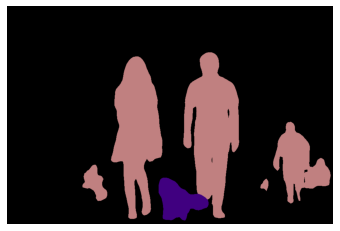

In [ ]:
img = Image.open('pareja.jpeg')
plt.imshow(img)
plt.show()

print ('Segmentation Image on FCN')
output = segment(fcn, path='pareja.jpeg', show_orig=False)

print ('Segmentation Image on DeepLabv3')
output = segment(dlab, path='pareja.jpeg', show_orig=False)

In [ ]:
import time

def infer_time(net, inp, dev='cuda'):  
  st = time.time()
  out1 = net.to(dev)(inp)
  et = time.time()
  
  return et - st

In [ ]:
avg_over = 100
img = Image.open('pareja.jpeg')
trf = T.Compose([T.Resize(256), 
                 T.CenterCrop(224), 
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0).to('cuda')

fcn_infer_time_list_gpu = [infer_time(fcn, inp) for _ in range(avg_over)]
fcn_infer_time_avg_gpu = sum(fcn_infer_time_list_gpu) / avg_over

dlab_infer_time_list_gpu = [infer_time(dlab, inp) for _ in range(avg_over)]
dlab_infer_time_avg_gpu = sum(dlab_infer_time_list_gpu) / avg_over

print (f'Inference time for first few calls for FCN      : {fcn_infer_time_list_gpu[:10]}')
print (f'Inference time for first few calls for DeepLabv3: {dlab_infer_time_list_gpu[:10]}')

print (f'The Average Inference time on FCN is:     {fcn_infer_time_avg_gpu:.3f}s')
print (f'The Average Inference time on DeepLab is: {dlab_infer_time_avg_gpu:.3f}s')

Inference time for first few calls for FCN      : [0.037003517150878906, 0.019660472869873047, 0.019379615783691406, 0.019231319427490234, 0.03777766227722168, 0.04516863822937012, 0.045246124267578125, 0.04511213302612305, 0.04329824447631836, 0.028234004974365234]
Inference time for first few calls for DeepLabv3: [0.03135991096496582, 0.027221202850341797, 0.03008413314819336, 0.03444695472717285, 0.03611135482788086, 0.03659391403198242, 0.03586149215698242, 0.03571319580078125, 0.0363163948059082, 0.036744117736816406]
The Average Inference time on FCN is:     0.029s
The Average Inference time on DeepLab is: 0.036s


In [ ]:
img = Image.open('parking.png')
plt.imshow(img)
plt.show()

print ('Segmentation Image on FCN')
rgb_fcn = segment(fcn, path='parking.png', show_orig=False)

print ('Segmentation Image on DeepLabv3')
rgb_dlab = segment(dlab, path='parking.png', show_orig=False)

rgb_fcn = rgb_fcn.astype(np.float32)
rgb_fcn = rgb_fcn/255
print(np.amax(rgb_fcn))

rgb_dlab = rgb_dlab.astype(np.float32)
rgb_dlab = rgb_dlab/255
print(np.amax(rgb_dlab))

trfFinal = T.Compose([T.Resize(640)])
tfImage = trfFinal(img)
npImage = np.asarray(tfImage)
npImage = npImage.astype(np.float32)
npImage = npImage/255
print(np.amax(npImage))

outImage1 = npImage*0.7 + rgb_fcn*0.3
plt.figure(figsize=(16,16)),plt.imshow(outImage1)
plt.show()

outImage2 = npImage*0.7 + rgb_dlab*0.3
plt.figure(figsize=(16,16)),plt.imshow(outImage2)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Más imágenes: https://github.com/milesial/Pytorch-UNet.git

y arquitectura de red UNet

### Ejercicio posible
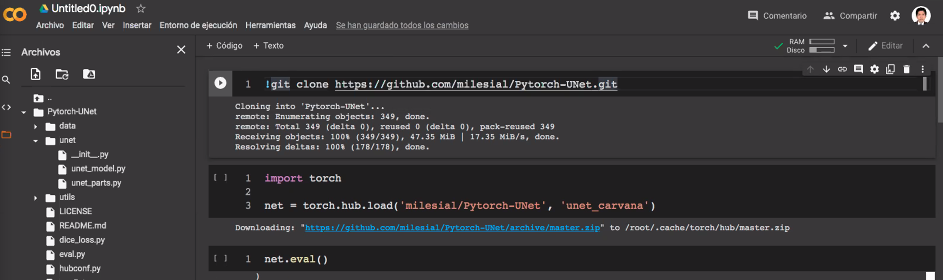

Ejercicio en: https://drive.google.com/drive/u/4/folders/1-C-XRwKcA7nlPARqpzAl-7WTxsKy5YlG (UNet notebook)

In [ ]:
#!git clone https://github.com/milesial/Pytorch-UNet.git